# YouTube trending videos

In [121]:
import os
from typing import List

import numpy as np
from numpy import nan

# import sys
# sys.path.append('..')
nan
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats

from helpers.files import load_csv, load_csv_file, save_csv
from helpers.json_helper import load_tokenized_text
from ped6.tfidf import add_tfidf_args

numeric_attrs = [
    "views", "likes", "dislikes", "comment_count", "description_len", "title_len", "channel_title_len",
    "publish_time_day_of_week", "publish_time_hour_of_day", "publish_time", "movie_domains_count"
]

bool_attrs = [
    "comments_disabled", "ratings_disabled", "video_error_or_removed"
]

selected_attrs = []

forbidden_attrs = [ "views", "likes", "dislikes", "comment_count"]


## Etap 5 - Powtórzone po przefiltrowaniu danych - Zbieranie danych nie-trending

### Wczytanie danych trending

In [122]:
gb_videos, us_videos = load_csv("ped5_t_filtered")
trending_videos = pd.concat([gb_videos, us_videos])

### Wczytanie danych nie trending

In [123]:
gb_non_videos, us_non_videos = load_csv("ped5_non_trending")
non_trending_videos = pd.concat([gb_non_videos, us_non_videos])
non_trending_videos.rename(columns={"category_id": "new_category_id"}, inplace=True)

### Atrybuty liczbowe

**Funkcja do rysowania wykresów**

In [124]:
def plot_numeric_attr(attr_name: str, trending: pd.DataFrame, non_trending: pd.DataFrame) -> None:
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))
    axes[0, 0].hist(trending[attr_name])
    axes[0, 0].title.set_text(f"Trending: {attr_name}")
    axes[0, 1].hist(non_trending[attr_name])
    axes[0, 1].title.set_text(f"Non Trending: {attr_name}")
    axes[1, 0].boxplot(
        [trending[trending[attr_name].notna()][attr_name], non_trending[attr_name]],
        labels=["Trending", "Non Trending"]
    )
    axes[1, 1].boxplot(
        [trending[trending[attr_name].notna()][attr_name], non_trending[attr_name]],
        labels=["Trending", "Non Trending"],
        showfliers=False
    )

**Views**

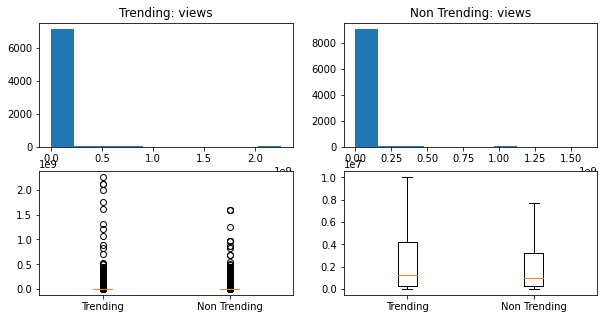

In [125]:
plot_numeric_attr("views", trending_videos, non_trending_videos)

**Likes**

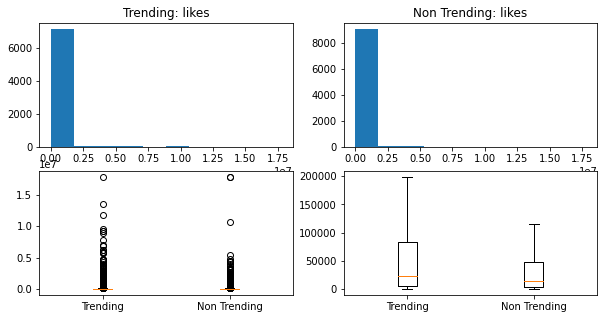

In [126]:
plot_numeric_attr("likes", trending_videos, non_trending_videos)

**Dislikes**

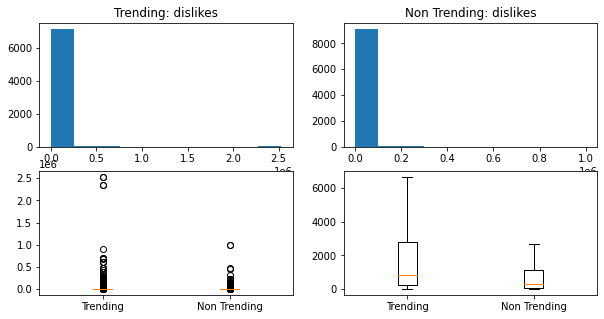

In [127]:
plot_numeric_attr("dislikes", trending_videos, non_trending_videos)

**Comment Count**

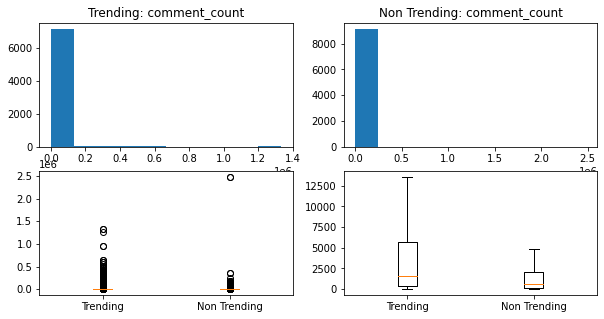

In [128]:
plot_numeric_attr("comment_count", trending_videos, non_trending_videos)

**Description length**

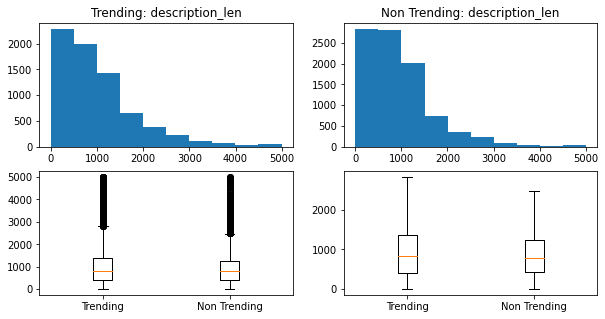

In [129]:
plot_numeric_attr("description_len", trending_videos, non_trending_videos)

**Title length**

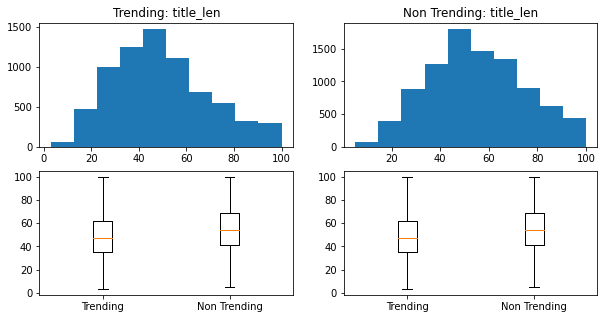

In [130]:
plot_numeric_attr("title_len", trending_videos, non_trending_videos)

**Channel title length**

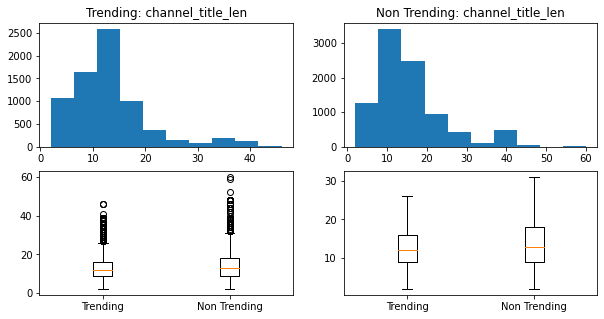

In [131]:
plot_numeric_attr("channel_title_len", trending_videos, non_trending_videos)

**Liczba linków**

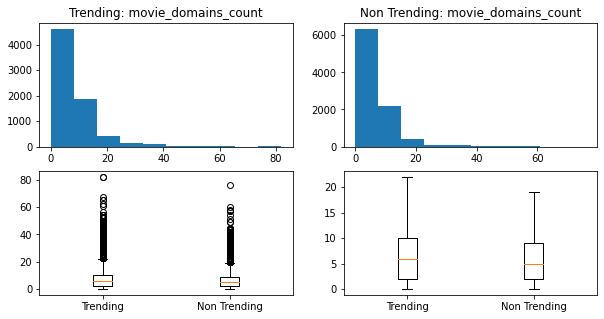

In [132]:
plot_numeric_attr("movie_domains_count", trending_videos, non_trending_videos)

### Atrybuty czasowe

**Dzień opublikowania filmu**

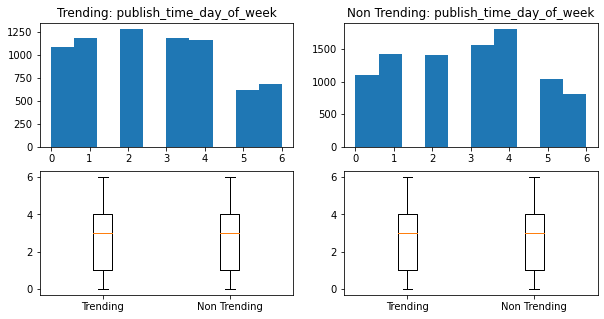

In [133]:
plot_numeric_attr("publish_time_day_of_week", trending_videos, non_trending_videos, )

**Godzina opublikowania filmu**

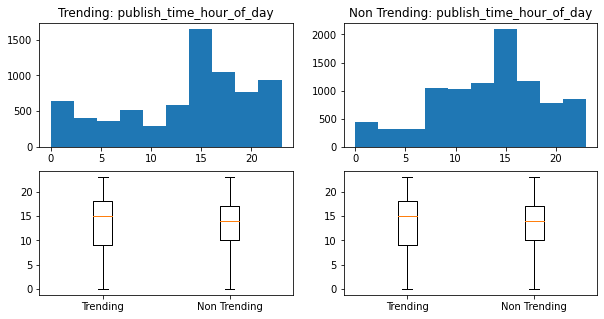

In [134]:
plot_numeric_attr("publish_time_hour_of_day", trending_videos, non_trending_videos)

**Data publikacji**

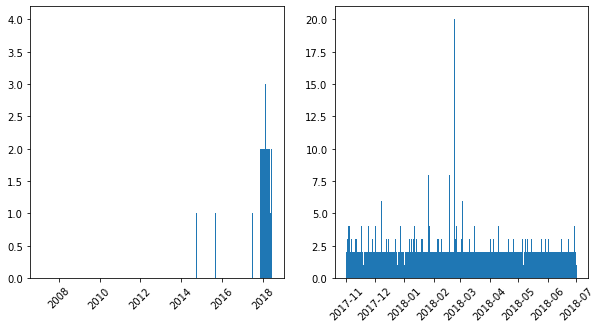

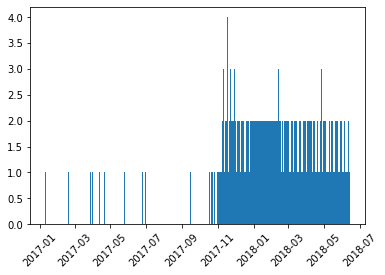

In [135]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

trending_publish_time_counts = pd.to_datetime(trending_videos["publish_time"],
                                              format="%Y-%m-%dT%H:%M:%SZ").value_counts()
trending_publish_time_counts = trending_publish_time_counts.rename_axis("publish_time").reset_index(name="count")

publish_times = pd.to_datetime(trending_videos["publish_time"], format="%Y-%m-%dT%H:%M:%SZ")
filtered = publish_times[publish_times >= "2017-01-01"]
filtered_counts = filtered.value_counts().rename_axis("publish_time").reset_index(name="count")

non_trending_publish_time_counts = pd.to_datetime(non_trending_videos["publish_time"],
                                                  format="%Y-%m-%dT%H:%M:%SZ").value_counts()
non_trending_publish_time_counts = non_trending_publish_time_counts.rename_axis("publish_time").reset_index(
    name="count")

axes[0].bar(pd.to_datetime(trending_publish_time_counts["publish_time"], format="%Y-%m-%dT%H:%M:%SZ"),
            trending_publish_time_counts["count"])
for tick in axes[0].get_xticklabels():
    tick.set_rotation(45)

axes[1].bar(pd.to_datetime(non_trending_publish_time_counts["publish_time"], format="%Y-%m-%dT%H:%M:%SZ"),
            non_trending_publish_time_counts["count"])
for tick in axes[1].get_xticklabels():
    tick.set_rotation(45)
plt.show()

plt.bar(pd.to_datetime(filtered_counts["publish_time"], format="%Y-%m-%dT%H:%M:%SZ"), filtered_counts["count"])
plt.xticks(rotation=45)
plt.show()

### Atrybuty logiczne

**Funkcja do rysowania wykresów**

In [136]:
def plot_bool_attr(attr_name: str) -> None:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    trending_values_counts = trending_videos[attr_name].value_counts().rename_axis("value").reset_index(name="count")
    axes[0].bar(np.arange(len(trending_values_counts)), trending_values_counts["count"])
    axes[0].set_xticks(np.arange(len(trending_values_counts)))
    axes[0].set_xticklabels(["False", "True"][:len(trending_values_counts)])
    axes[0].title.set_text(f"Trending: {attr_name}")
    non_trending_values_counts = non_trending_videos[attr_name].value_counts().rename_axis("value").reset_index(
        name="count")
    axes[1].bar(np.arange(len(non_trending_values_counts)), non_trending_values_counts["count"])
    axes[1].set_xticks(np.arange(len(non_trending_values_counts)))
    axes[1].set_xticklabels(["False", "True"][:len(non_trending_values_counts)])
    axes[1].title.set_text(f"Non Trending: {attr_name}")

**Zablokowanie komentowania - comments disabled**

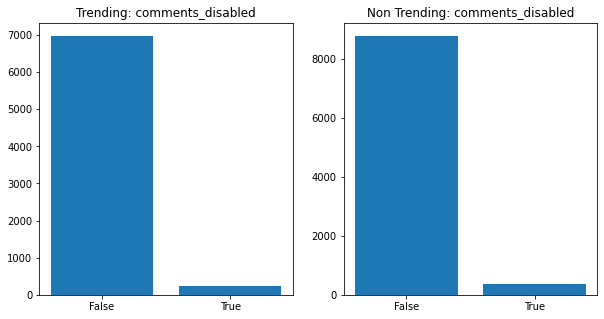

In [137]:
plot_bool_attr("comments_disabled")

**Zablokowanie oceny - ratings disabled**

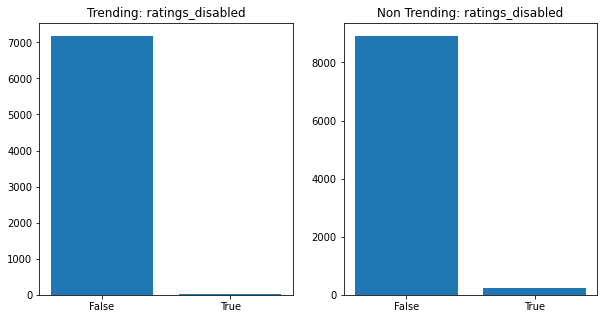

In [138]:
plot_bool_attr("ratings_disabled")

**Błąd filmu lub usunięty - video error or removed**

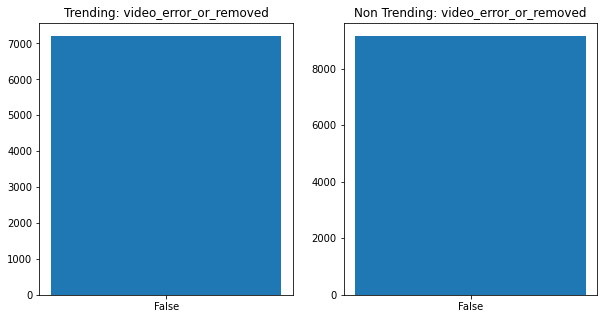

In [139]:
plot_bool_attr("video_error_or_removed")

### Atrybuty tekstowe

**Metoda do wyświetlania wykresów**

In [140]:
def plot_tokenized_stats(attr_name):
    trending_path = os.path.join("ped5_t_filtered", "words")

    gb_words = load_csv_file(os.path.join(trending_path, f"GB_{attr_name}.csv"))
    us_words = load_csv_file(os.path.join(trending_path, f"US_{attr_name}.csv"))
    trending_words = pd.concat([gb_words, us_words])
    trending_values_counts = trending_words.value_counts().rename_axis("words").reset_index(name="count")
    tr_head = trending_values_counts.head(50)

    non_trending_path = os.path.join("ped5_nt_filtered", "words")

    gb_non_words = load_csv_file(os.path.join(non_trending_path, f"GB_{attr_name}.csv"))
    us_non_words = load_csv_file(os.path.join(non_trending_path, f"US_{attr_name}.csv"))
    non_trending_words = pd.concat([gb_non_words, us_non_words])
    non_trending_values_counts = non_trending_words.value_counts().rename_axis("words").reset_index(name="count")
    non_tr_head = non_trending_values_counts.head(50)

    plt.subplots(figsize=(18, 5))
    plt.bar(tr_head["words"], tr_head["count"])
    plt.title("Trending")
    plt.xticks(rotation=270, fontsize=15)
    plt.show()

    plt.subplots(figsize=(18, 5))
    plt.bar(non_tr_head["words"], non_tr_head["count"])
    plt.title("Non Trending")
    plt.xticks(rotation=270, fontsize=15)
    plt.show()

**Tytuły kanałów - channel_title**

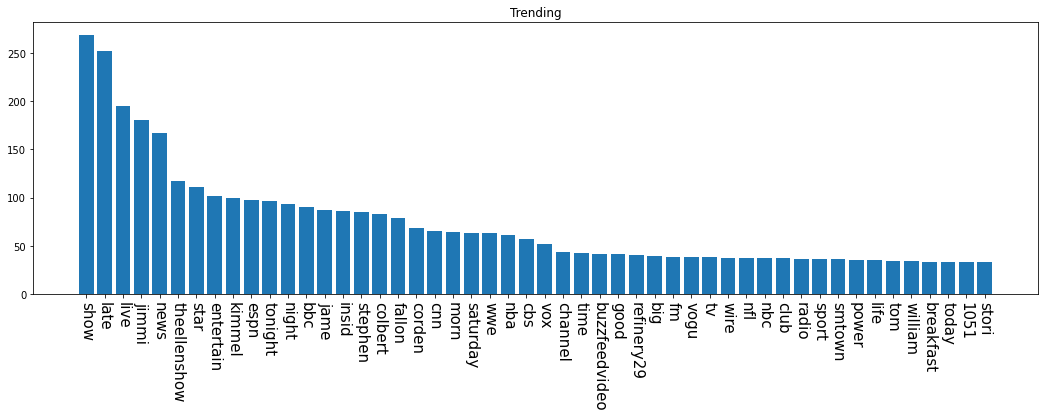

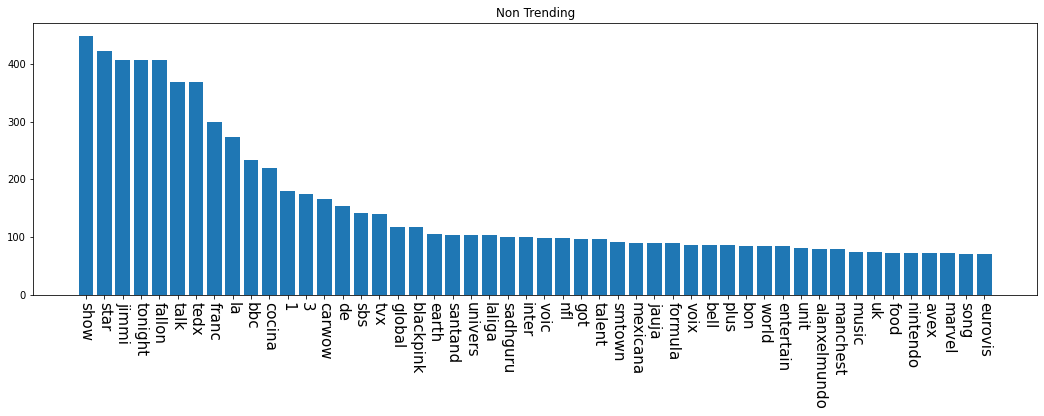

In [141]:
plot_tokenized_stats("channel_title")

**Tytuły filmów - title**

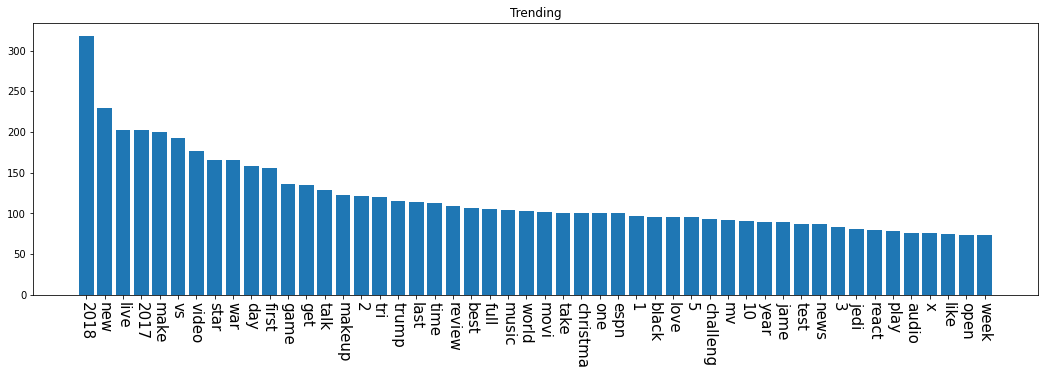

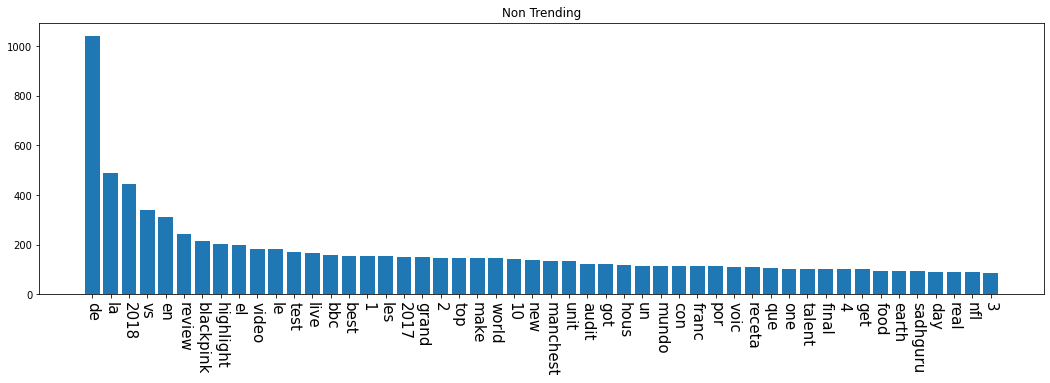

In [142]:
plot_tokenized_stats("title")

**Opisy filmów - description**

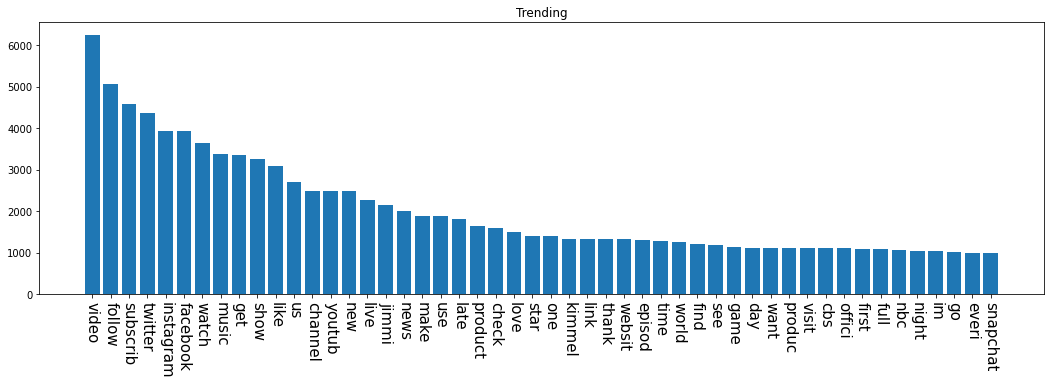

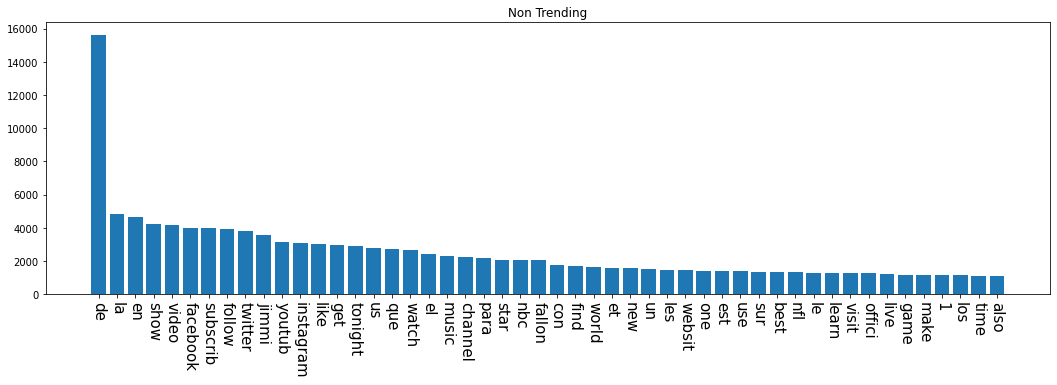

In [143]:
plot_tokenized_stats("description")

**Domeny**

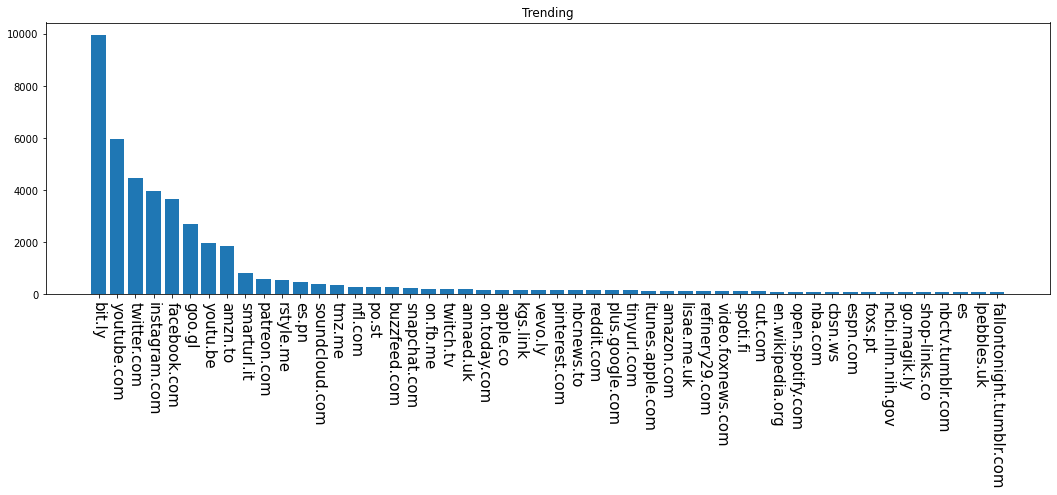

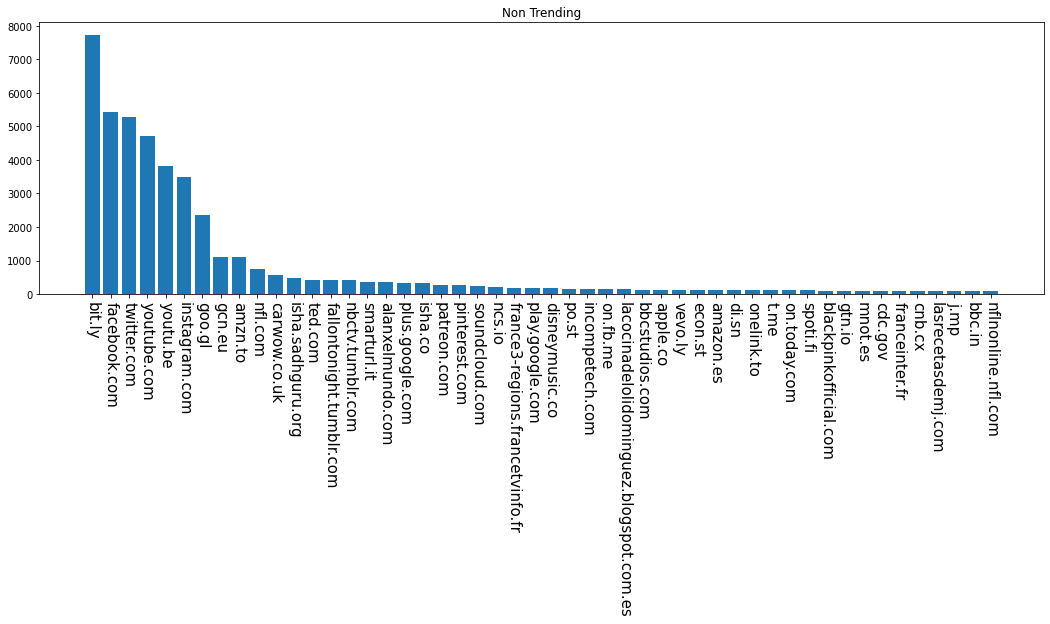

In [144]:
plot_tokenized_stats("domain")

**Tagi**

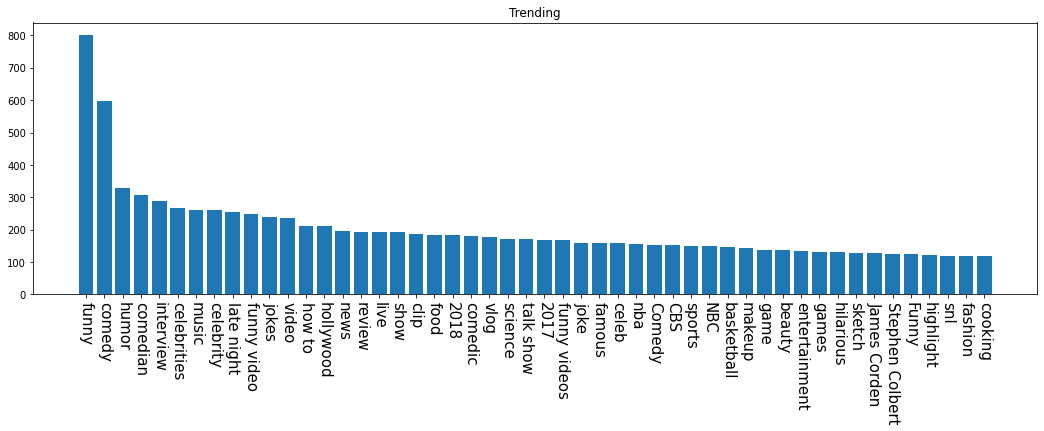

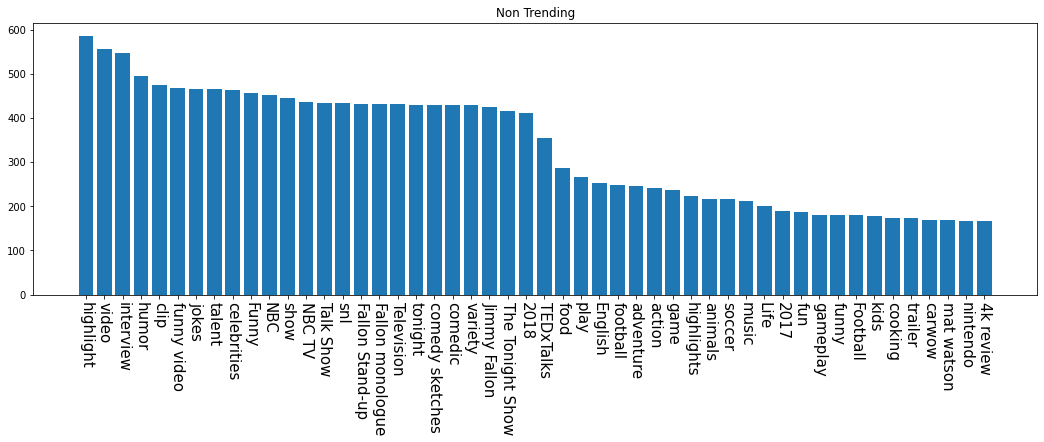

In [145]:
def prepare_tags(tags):
    tags.index = tags.index.droplevel(-1)
    tags.name = "tags"
    tags = tags.to_frame()
    tags_counts = tags.value_counts()
    tags_counts = tags_counts.rename_axis("tag").reset_index(name="count")
    return tags_counts


non_trending_tags = non_trending_videos["tags"].str.split("|").apply(pd.Series, 1).stack()
trending_tags = trending_videos["tags"].str.split("|").apply(pd.Series, 1).stack()

non_trending_tags = prepare_tags(non_trending_tags)
trending_tags = prepare_tags(trending_tags)

plt.subplots(figsize=(18, 5))
plt.bar(trending_tags["tag"].head(50), trending_tags["count"].head(50))
plt.title("Trending")
plt.xticks(rotation=270, fontsize=15)
plt.show()

plt.subplots(figsize=(18, 5))
plt.bar(non_trending_tags["tag"].head(50), non_trending_tags["count"].head(50))
plt.title("Non Trending")
plt.xticks(rotation=270, fontsize=15)
plt.show()

## Ocena atrybutów


### Atrybuty numeryczne

Korelacja atrybutów liczbowych z klasą decyzyjną trending czy nietrending

Atrybuty numeryczne zostały ocenione za pomocą analizy wariancji (ANOVA Analysis of Variance).
Zastosowana metoda wynika z tego, że mamy jednym z atrybutów jest atrybut
nominalny - klasę decyzyjną trending vs non trending.

Przyjęte hipotezy:

$$ H_0 $$: Średnie w poszczególnych grupach są takie same.

$$ H_1 $$: Średnie w poszczególnych grupach są różne.


Przyjęty poziom istotności: $$ \alpha = 0.05 $$

In [146]:
gb_videos, us_videos = load_csv("ped3_data")
trending_videos = pd.concat([gb_videos, us_videos])

for name in numeric_attrs:
    trending_videos[name] = trending_videos[name].apply(lambda x: eval(x)[-1] if eval(x) else np.nan)
trending_videos["tags"] = trending_videos["tags"].apply(lambda x: eval(x)[-1] if eval(x) else np.nan)

for name in bool_attrs:
    trending_videos[name] = trending_videos[name].apply(lambda x: eval(x)[-1] if eval(x) else np.nan)

gb_non_videos, us_non_videos = load_csv("ped5_non_trending")
non_trending_videos = pd.concat([gb_non_videos, us_non_videos])
non_trending_videos.rename(columns={"category_id": "new_category_id"}, inplace=True)



numeric_attrs = [
    "views", "likes", "dislikes", "comment_count", "description_len", "title_len", "channel_title_len",
    "publish_time_day_of_week", "publish_time_hour_of_day"
]


def anova(data: List[pd.DataFrame], attr: str, show_plots: bool = True):
    data_set = list(map(lambda x: x[attr].dropna(), data))
    f_score, p_value = stats.f_oneway(
        *data_set
    )
    print(f"{attr}: f_score = {f_score} p_value = {p_value}")
    if show_plots:
        plt.title(attr)
        plt.boxplot(data_set, showfliers=False)
        labels = ["Trending", "Non Trending"]
        plt.xticks(np.arange(1, len(labels) + 1), labels, rotation=270, fontsize=15)
        plt.show()
    return f_score, p_value



views: f_score = 69.79516798837099 p_value = 7.032104152735793e-17


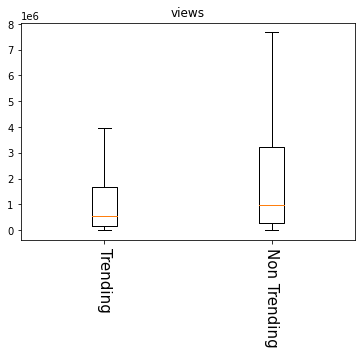

likes: f_score = 0.45664950167702134 p_value = 0.49920233267650327


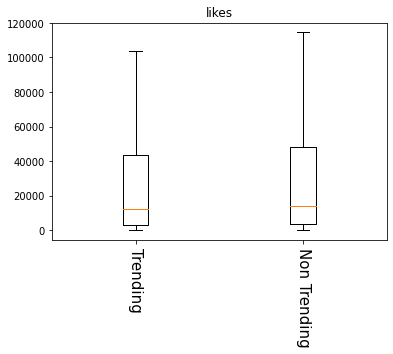

dislikes: f_score = 12.875145750774761 p_value = 0.0003338219177473799


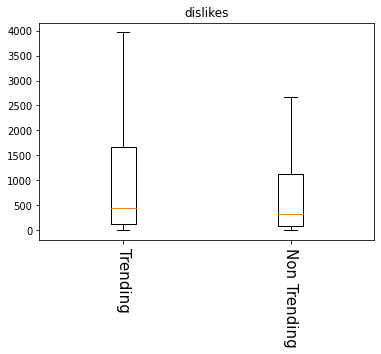

comment_count: f_score = 46.29532420317187 p_value = 1.0477345110552764e-11


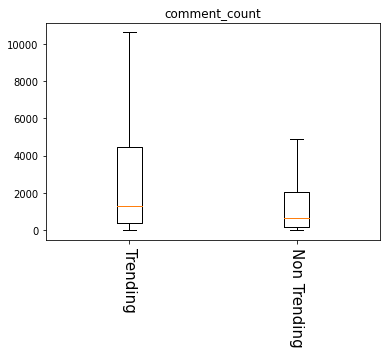

description_len: f_score = 1.8769109622009785 p_value = 0.17070216883733802


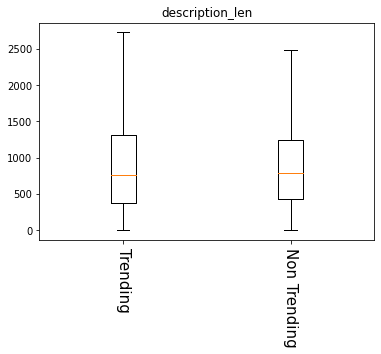

title_len: f_score = 278.2918318610575 p_value = 4.948704666912933e-62


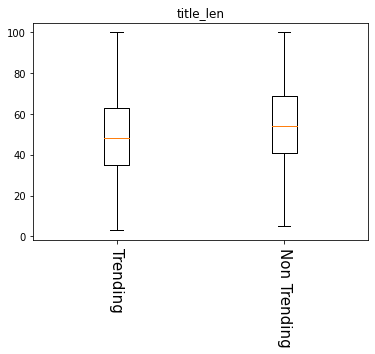

channel_title_len: f_score = 275.0369250707506 p_value = 2.474694976965115e-61


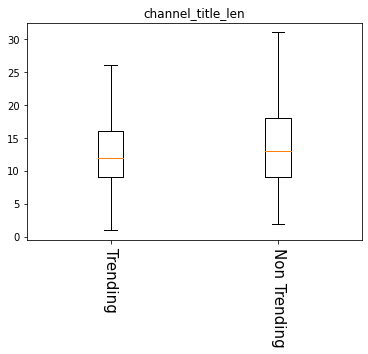

publish_time_day_of_week: f_score = 87.87622524975865 p_value = 7.738198131164216e-21


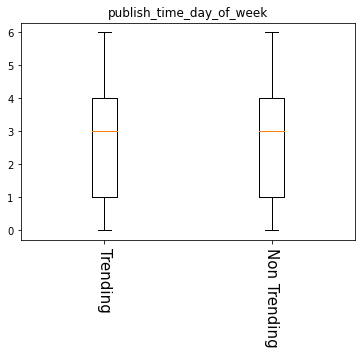

publish_time_hour_of_day: f_score = 1.7432870661216051 p_value = 0.1867389666064676


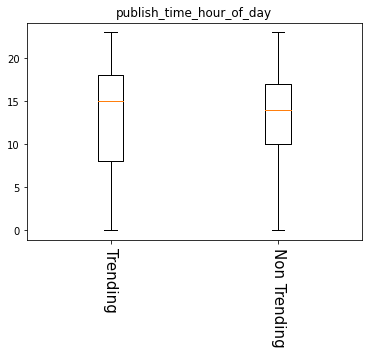

,attr,f score,p value,leq alpha
0,views,69.795168,7.032104e-17,True
1,likes,0.456650,4.992023e-01,False
2,dislikes,12.875146,3.338219e-04,True
3,comment_count,46.295324,1.047735e-11,True
4,description_len,1.876911,1.707022e-01,False
5,title_len,278.291832,4.948705e-62,True
6,channel_title_len,275.036925,2.474695e-61,True
7,publish_time_day_of_week,87.876225,7.738198e-21,True
8,publish_time_hour_of_day,1.743287,1.867390e-01,False


In [147]:
data_set = [trending_videos, non_trending_videos]

f_scores = pd.DataFrame()
alpha = 0.05
for i in numeric_attrs:
    f, p = anova(data_set, i)
    f_scores = f_scores.append(pd.DataFrame(
        data={"attr": [i], "f score": [f], "p value": [p], "leq alpha": [p <= alpha]}
    ), ignore_index=True)
    if p <= alpha and i not in forbidden_attrs:
        selected_attrs.append(i)
f_scores

### Atrybuty liczbowe wyekstrahowane z cech obrazków

Liczone są analogicznie jak poprzednich etapach. Najpierw wczytywane są już przeliczone dane, a następnie za pomocą anovy liczona jest istotność statystyczna.

In [148]:
images_data_cols = ["gray_mean_score", "color_mean_score", "gray_hist_score", "red_hist_score", "green_hist_score",
                    "blue_hist_score",
                    "edges_score", "entropy_score"]

non_trending_videos_img = load_csv("images_data_non_trending")[0]

for col in images_data_cols:
    non_trending_videos[col] = non_trending_videos_img[col].reset_index(drop=True)

gray_mean_score: f_score = 0.6400092405816675 p_value = 0.42371873053362397


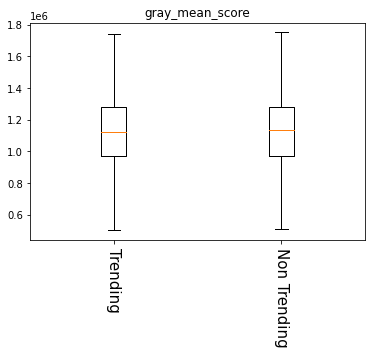

color_mean_score: f_score = 17.145171033502486 p_value = 3.479748466139466e-05


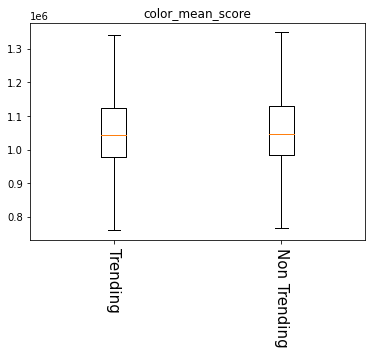

gray_hist_score: f_score = 0.38967922214826783 p_value = 0.5324765167320389


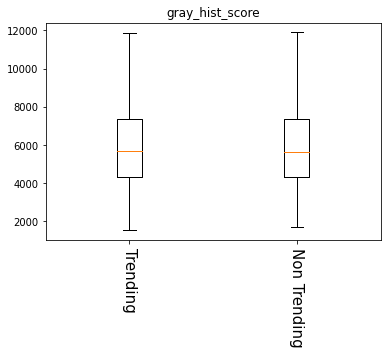

red_hist_score: f_score = 11.718216331373172 p_value = 0.0006203845586431853


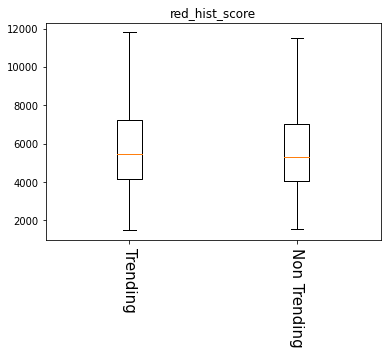

green_hist_score: f_score = 0.17171164580274526 p_value = 0.6786003480772745


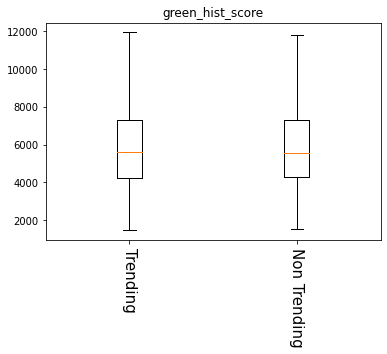

blue_hist_score: f_score = 2.05331470370996 p_value = 0.15189377284080863


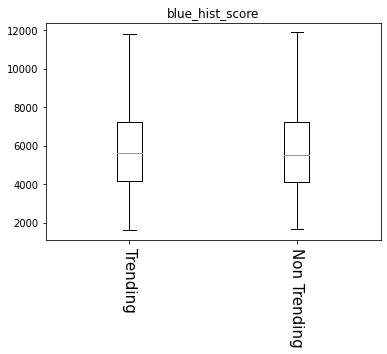

edges_score: f_score = 72.59777756726216 p_value = 1.7221748641910952e-17


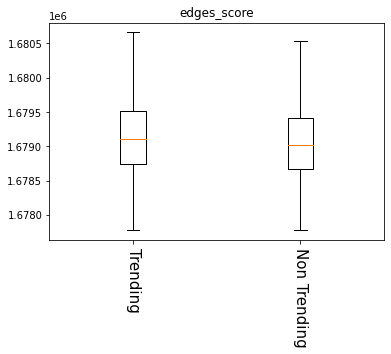

entropy_score: f_score = 2.251645145703959 p_value = 0.13349117544949876


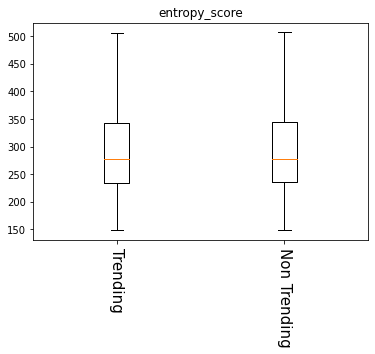

,attr,f score,p value,leq alpha
0,gray_mean_score,0.640009,4.237187e-01,False
1,color_mean_score,17.145171,3.479748e-05,True
2,gray_hist_score,0.389679,5.324765e-01,False
3,red_hist_score,11.718216,6.203846e-04,True
4,green_hist_score,0.171712,6.786003e-01,False
5,blue_hist_score,2.053315,1.518938e-01,False
6,edges_score,72.597778,1.722175e-17,True
7,entropy_score,2.251645,1.334912e-01,False


In [149]:
data_set = [trending_videos, non_trending_videos_img]

f_scores_img = pd.DataFrame()
alpha = 0.05
for i in images_data_cols:
    f, p = anova(data_set, i)
    f_scores_img = f_scores_img.append(pd.DataFrame(
        data={"attr": [i], "f score": [f], "p value": [p], "leq alpha": [p <= alpha]}
    ), ignore_index=True)
    if p <= alpha and i not in forbidden_attrs:
        selected_attrs.append(i)
f_scores_img

Spośród atrybutów z obrazków, można zauważyć, że okoła połowa z nich może okazać się pomocna w klasyfkacji do podziału trending/non_trending, gdzie najbardziej istotny zdaje się być informacja o krawędziach, co można częściowo interpretować jako liczbę różnych obiektów na obrazku

### Ocena atrybutów tekstowych

W przypadku atrybutów tekstowych zdecydowaliśmy się użyć reprezentacji TF-IDF

In [150]:
n_features = 20

**Tytuły - title**

In [151]:
title_tfidf, f_names = add_tfidf_args("title", n_features)
trending_tfidf = title_tfidf[:len(trending_videos)]
non_trending_tfidf = title_tfidf[len(trending_videos):]
for i, name in enumerate(f_names):
    trending_videos[f"title_tfidf_{name}"] = trending_tfidf[i]
    non_trending_videos[f"title_tfidf_{name}"] = non_trending_tfidf[i]

f_scores = pd.DataFrame()
for i in range(n_features):
    data_set = [trending_tfidf[i], non_trending_tfidf[i]]
    f_score, p_value = stats.f_oneway(
        *data_set
    )
    f_scores = f_scores.append(pd.DataFrame(
        data={"attr": [f_names[i]], "f score": [f_score], "p value": [p_value], "leq alpha": [p_value <= alpha]}
    ), ignore_index=True)
    if p_value <= alpha and i not in forbidden_attrs:
        selected_attrs.append(f"title_tfidf_{f_names[i]}")
f_scores

,attr,f score,p value,leq alpha
0,10,2.406685,1.208384e-01,False
1,2017,31.552024,1.975032e-08,True
2,2018,13.382912,2.547683e-04,True
3,best,0.498475,4.801816e-01,False
4,day,21.519239,3.531598e-06,True
5,de,687.700690,2.378166e-148,True
6,en,211.860114,1.112809e-47,True
7,get,22.574818,2.039282e-06,True
8,highlight,50.101674,1.522413e-12,True
9,la,302.389464,4.299312e-67,True


**Tytuły kanałów - channel_title**

In [152]:
channel_title_tfidf, f_names = add_tfidf_args("channel_title", n_features)
trending_tfidf = channel_title_tfidf[:len(trending_videos)]
non_trending_tfidf = channel_title_tfidf[len(trending_videos):]

for i, name in enumerate(f_names):
    trending_videos[f"channel_title_tfidf_{name}"] = trending_tfidf[i]
    non_trending_videos[f"channel_title_tfidf_{name}"] = non_trending_tfidf[i]


f_scores = pd.DataFrame()
for i in range(n_features):
    data_set = [trending_tfidf[i], non_trending_tfidf[i]]
    f_score, p_value = stats.f_oneway(
        *data_set
    )
    f_scores = f_scores.append(pd.DataFrame(
        data={"attr": [f_names[i]], "f score": [f_score], "p value": [p_value], "leq alpha": [p_value <= alpha]}
    ), ignore_index=True)
    if p_value <= alpha and i not in forbidden_attrs:
        selected_attrs.append(f"channel_title_tfidf_{f_names[i]}")
f_scores

,attr,f score,p value,leq alpha
0,bbc,5.219662,2.234634e-02,True
1,carwow,113.446777,2.125167e-26,True
2,cocina,129.490388,6.959851e-30,True
3,de,104.298905,2.078675e-24,True
4,entertain,3.454414,6.310202e-02,False
5,fallon,220.007818,1.965441e-49,True
6,franc,326.558665,2.972889e-72,True
7,jimmi,62.279930,3.177512e-15,True
8,la,247.094028,2.981302e-55,True
9,late,68.402857,1.440100e-16,True


**Opisy - description**

In [153]:
description_tfidf, f_names = add_tfidf_args("description", n_features)
trending_tfidf = description_tfidf[:len(trending_videos)]
non_trending_tfidf = description_tfidf[len(trending_videos):]

for i, name in enumerate(f_names):
    trending_videos[f"description_tfidf_{name}"] = trending_tfidf[i]
    non_trending_videos[f"description_tfidf_{name}"] = non_trending_tfidf[i]


f_scores = pd.DataFrame()
for i in range(n_features):
    data_set = [trending_tfidf[i], non_trending_tfidf[i]]
    f_score, p_value = stats.f_oneway(
        *data_set
    )
    f_scores = f_scores.append(pd.DataFrame(
        data={"attr": [f_names[i]], "f score": [f_score], "p value": [p_value], "leq alpha": [p_value <= alpha]}
    ), ignore_index=True)
    if p_value <= alpha and i not in forbidden_attrs:
        selected_attrs.append(f"description_tfidf_{f_names[i]}")
f_scores

,attr,f score,p value,leq alpha
0,bit,61.956995,3.741300e-15,True
1,com,36.881035,1.284916e-09,True
2,de,2000.997523,0.000000e+00,True
3,facebook,2.224304,1.358742e-01,False
4,follow,222.771668,5.001455e-50,True
5,get,93.356695,5.038026e-22,True
6,http,99.084040,2.842228e-23,True
7,https,0.751647,3.859686e-01,False
8,instagram,140.710059,2.568571e-32,True
9,like,32.721924,1.082926e-08,True


**Tagi - tags**

In [154]:
tags_tfidf, f_names = add_tfidf_args("tags", n_features)
trending_tfidf = tags_tfidf[:len(trending_videos)]
non_trending_tfidf = tags_tfidf[len(trending_videos):]

for i, name in enumerate(f_names):
    trending_videos[f"tags_tfidf_{name}"] = trending_tfidf[i]
    non_trending_videos[f"tags_tfidf_{name}"] = non_trending_tfidf[i]

f_scores = pd.DataFrame()
for i in range(n_features):
    data_set = [trending_tfidf[i], non_trending_tfidf[i]]
    f_score, p_value = stats.f_oneway(
        *data_set
    )
    f_scores = f_scores.append(pd.DataFrame(
        data={"attr": [f_names[i]], "f score": [f_score], "p value": [p_value], "leq alpha": [p_value <= alpha]}
    ), ignore_index=True)
    if p_value <= alpha and i not in forbidden_attrs:
        selected_attrs.append(f"tags_tfidf_{f_names[i]}")
f_scores


,attr,f score,p value,leq alpha
0,2017,7.570329,5.940583e-03,True
1,2018,199.948783,4.086210e-45,True
2,anim,7.593666,5.864209e-03,True
3,best,23.012577,1.624421e-06,True
4,celebr,34.500679,4.348232e-09,True
5,comedi,170.154016,1.094291e-38,True
6,de,582.333743,2.460107e-126,True
7,fallon,200.366510,3.321433e-45,True
8,funni,167.979094,3.228858e-38,True
9,game,33.430872,7.526310e-09,True


### Zapisanie danych

In [155]:
# gb_videos, us_videos = load_csv("ped3_data")
# trending_videos = pd.concat([gb_videos, us_videos])
#
# for name in numeric_attrs:
#     trending_videos[name] = trending_videos[name].apply(lambda x: eval(x)[-1] if eval(x) else np.nan)
# trending_videos["tags"] = trending_videos["tags"].apply(lambda x: eval(x)[-1] if eval(x) else np.nan)
#
# for name in bool_attrs:
#     trending_videos[name] = trending_videos[name].apply(lambda x: eval(x)[-1] if eval(x) else np.nan)
#
# gb_non_videos, us_non_videos = load_csv("ped5_non_trending")
# non_trending_videos = pd.concat([gb_non_videos, us_non_videos])
# non_trending_videos.rename(columns={"category_id": "new_category_id"}, inplace=True)

print(selected_attrs)
trending_videos = trending_videos[selected_attrs].copy()
non_trending_videos = non_trending_videos[selected_attrs].copy()
trending_videos["trending"] = 1
non_trending_videos["trending"] = 0

new_videos = pd.concat([trending_videos, non_trending_videos])
save_csv("ped6_filtered_data", [new_videos], ["videos"])

['title_len', 'channel_title_len', 'publish_time_day_of_week', 'color_mean_score', 'red_hist_score', 'edges_score', 'title_tfidf_2017', 'title_tfidf_2018', 'title_tfidf_day', 'title_tfidf_de', 'title_tfidf_en', 'title_tfidf_get', 'title_tfidf_highlight', 'title_tfidf_la', 'title_tfidf_make', 'title_tfidf_new', 'title_tfidf_review', 'title_tfidf_star', 'title_tfidf_test', 'title_tfidf_vs', 'title_tfidf_war', 'channel_title_tfidf_bbc', 'channel_title_tfidf_carwow', 'channel_title_tfidf_cocina', 'channel_title_tfidf_de', 'channel_title_tfidf_fallon', 'channel_title_tfidf_franc', 'channel_title_tfidf_jimmi', 'channel_title_tfidf_la', 'channel_title_tfidf_late', 'channel_title_tfidf_live', 'channel_title_tfidf_news', 'channel_title_tfidf_nfl', 'channel_title_tfidf_sbs', 'channel_title_tfidf_show', 'channel_title_tfidf_star', 'channel_title_tfidf_talk', 'channel_title_tfidf_tedx', 'channel_title_tfidf_tonight', 'channel_title_tfidf_tvx', 'description_tfidf_bit', 'description_tfidf_com', 'des